In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline  


In [567]:
# create a data frame of the matched data
df_matched = pd.read_csv("matched_data.csv")
df_matched = df_matched.replace('DK',np.nan)

df_all = pd.read_excel("Hopper 2016 - analysis.xls")
df_all = df_all.replace('DK',np.nan)


In [535]:
oldwidth=pd.get_option('display.max_colwidth') # show the full width of SA2 column
pd.set_option('display.max_colwidth', -1)

# Analysis of pre-survey interests

### Here we will examine the interest in humanitarian issues versus CS skill development

In [529]:
SA1_answers = df_all['SA1.'].dropna() # grab the non-empty SA1 answers
print("Total non-empty answers:", len(SA1_answers))
print("How many mentioned a word related to helping:", sum(SA1_answers.str.contains('help|human|soci|change|meaning|giving|good|give')))

Total non-empty answers: 74
How many mentioned a word related to helping: 23


How many mentioned skill development?

In [530]:
print("How many mentioned a word related to skill development:", sum(SA1_answers.str.contains('skill|learn|improve|gain')))

How many mentioned a word related to skill development: 27


In [543]:
print("How many mentioned a word related to skill development:", sum(SA1_answers.str.contains('open.source')))
SA1_answers[SA1_answers.str.contains('open source')]

How many mentioned a word related to skill development: 19


9      More about benefit of open source                                                                                                                                                                                                           
13     How to do open source stuff.                                                                                                                                                                                                                
17     Get exposed to some idea and open source tools                                                                                                                                                                                              
21     Group work and what is the role of open source/computing in improving….                                                                                                                                                                     
23     I teach computing

### Graph of Programming Ability

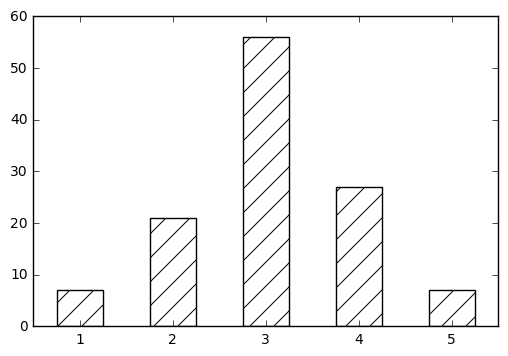

In [597]:
prog_ability = df_all['Prog. Ability'].dropna() # grab the non-empty SA1 answers
prog_ability.round().astype(int).value_counts().sort_index().plot(kind="bar",color="white",hatch="/",rot=0)
plt.savefig("program_ability.png")

### Graph of Years of Experience

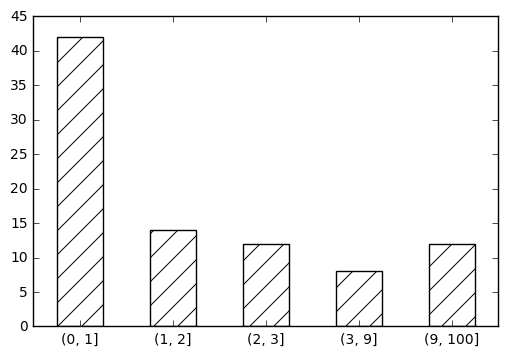

In [605]:
mths_exp = df_all['Months experience'].dropna() # grab the non-empty Months exp
years_exp = mths_exp/12
filter_vals = [0,1,2,3,9,100]
out = pd.cut(years_exp, bins=filter_vals)
counts = pd.value_counts(out)
counts = counts.reindex(out.cat.categories)
ax = counts.plot(kind="bar",color="white",hatch="/",rot=0)
#ax.set_xticklabels(["1 year or less","1-2 years","2-3 years","3-9 years","> 10 years"])
plt.savefig("years_exp.png")

# Analysis by Origin

**Pre-survey results** recreation of graph by Lori

This analysis is being done on the origin unmatched data

(0, 5.5)

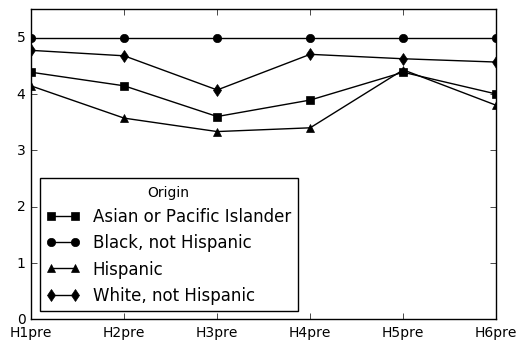

In [183]:

pre_survey_race = df_all[['Origin','H1pre','H2pre','H3pre','H4pre','H5pre','H6pre']]
means_pre = pre_survey_race.groupby('Origin').mean()
tp = means_pre.transpose()

ax = tp.plot.line(style=['s-k','o-k','^-k','d-k'])


ax.set_ylim([0,5.5])


**Post-survey results** recreation of graph by Lori

(0, 5.5)

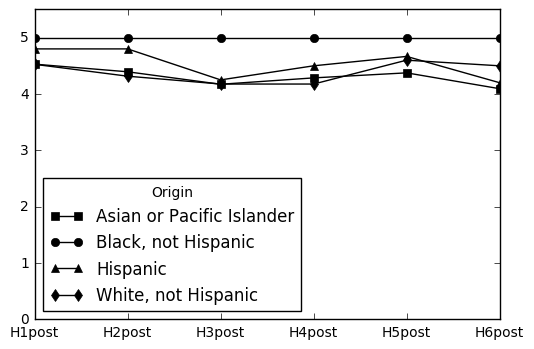

In [184]:
#print(list(df_all))
post_survey_race = df_all[['Origin','H1post','H2post','H3post','H4post','H5post','H6post']]
post_survey_race = post_survey_race.replace('DK',np.nan)
#pre_survey_racea
means_post = post_survey_race.groupby('Origin').mean()
means_post = means_post.replace(np.nan,5.0) # Handle the one NaN entry
tp = means_post.transpose()
ax = tp.plot.line(style=['s-k','o-k','^-k','d-k'])
ax.set_ylim([0,5.5])

# Recreating Lori's t-test across All and Matched Data

Below, I recreate Lori's t-test result. This looks for general changes across the Likert questions. The tables confirm close similarity to Lori's analysis (hooray!) and that comparing all respondents we only see significant change in H3 and with matched data we see no significance.

In [272]:
print("All Data (Table 5 in paper)")
for i in range(1,7):
    num = str(i)
    df_H = df_all[['Origin','H'+ num +'pre','H'+ num +'post']]

    H_pre = df_H['H'+ num +'pre'].dropna()
    H_post = df_H['H'+ num +'post'].dropna()
    diff = H_post.mean() - H_pre.mean()
    p_value = ttest_ind(H_pre, H_post)[1]
    print("H"+ num, "%.3f, %.3f (N=%d (pre),%d (post))" % (diff,p_value,H_pre.count(),H_post.count()), end=" ") # pvalue
    if abs(diff) > p_value:
        print(" <-- significant")
    else:
        print()
        
        
print("\nMatched Data (Table 6 in paper)")
for i in range(1,7):
    num = str(i)
    df_H = df_matched[['Origin','H'+ num +'pre','H'+ num +'post']].dropna()

    H_pre = df_H['H'+ num +'pre']
    H_post = df_H['H'+ num +'post']
    diff = H_post.mean() - H_pre.mean()
    p_value = ttest_rel(H_pre, H_post)[1]
    print("H"+ num, "%.3f, %.3f (N=%d (pre),%d (post))" % (diff,p_value,H_pre.count(),H_post.count()), end=" ") # pvalue
    if abs(diff) > p_value:
        print(" <-- significant")
    else:
        print()

All Data (Table 5 in paper)
H1 0.043, 0.770 (N=111 (pre),65 (post)) 
H2 0.147, 0.377 (N=109 (pre),64 (post)) 
H3 0.443, 0.026 (N=96 (pre),57 (post))  <-- significant
H4 0.162, 0.395 (N=99 (pre),55 (post)) 
H5 0.019, 0.898 (N=112 (pre),65 (post)) 
H6 0.053, 0.749 (N=105 (pre),64 (post)) 

Matched Data (Table 6 in paper)
H1 -0.152, 0.212 (N=46 (pre),46 (post)) 
H2 -0.136, 0.323 (N=44 (pre),44 (post)) 
H3 0.079, 0.653 (N=38 (pre),38 (post)) 
H4 0.026, 0.872 (N=38 (pre),38 (post)) 
H5 -0.089, 0.323 (N=45 (pre),45 (post)) 
H6 -0.122, 0.482 (N=41 (pre),41 (post)) 


# Significant Likert changes by Race

We only notified a significant change by in H3 across all respondents. However, if we breakdown the responses by race/origin we see that there were numerous significant changes.

In [257]:
# These are how many respondents entered their Origin/Race, but they may have left Likert questions blank resulting in lower N values below

df_all[['ID','Origin']].groupby('Origin').count()

,ID
Origin,
Asian or Pacific Islander,71
"Black, not Hispanic",2
Hispanic,10
"White, not Hispanic",32


In [262]:
from scipy.stats import ttest_ind

for race in ["White, not Hispanic", "Hispanic", "Asian or Pacific Islander"]:
    print("Analyzing:", race)
    for i in range(1,7):
        num = str(i)
        df_H = df_all[['Origin','H'+ num +'pre','H'+ num +'post']]

        H_pre = df_H['H'+ num +'pre'][df_H['Origin'] == race].dropna()
        H_post = df_H['H'+ num +'post'][df_H1['Origin'] == race].dropna()
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_ind(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d (pre),%d (post))" % (diff,p_value,H_pre.count(),H_post.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print(" <-- significant")
        else:
            print()
    print()

Analyzing: White, not Hispanic
H1 -0.248, 0.318 (N=31 (pre),19 (post)) 
H2 -0.362, 0.163 (N=31 (pre),19 (post))  <-- significant
H3 0.105, 0.758 (N=28 (pre),17 (post)) 
H4 -0.527, 0.043 (N=27 (pre),17 (post))  <-- significant
H5 -0.025, 0.911 (N=32 (pre),20 (post)) 
H6 -0.067, 0.765 (N=30 (pre),20 (post)) 

Analyzing: Hispanic
H1 0.657, 0.360 (N=7 (pre),5 (post))  <-- significant
H2 1.229, 0.090 (N=7 (pre),5 (post))  <-- significant
H3 0.917, 0.396 (N=6 (pre),4 (post))  <-- significant
H4 1.100, 0.287 (N=5 (pre),4 (post))  <-- significant
H5 0.238, 0.721 (N=7 (pre),6 (post)) 
H6 0.400, 0.614 (N=5 (pre),5 (post)) 

Analyzing: Asian or Pacific Islander
H1 0.144, 0.483 (N=70 (pre),34 (post)) 
H2 0.249, 0.294 (N=69 (pre),33 (post)) 
H3 0.572, 0.037 (N=60 (pre),29 (post))  <-- significant
H4 0.393, 0.146 (N=65 (pre),28 (post))  <-- significant
H5 -0.011, 0.961 (N=70 (pre),32 (post)) 
H6 0.094, 0.697 (N=67 (pre),32 (post)) 



In [278]:
for race in ["White, not Hispanic", "Hispanic", "Asian or Pacific Islander"]:
    print("Analyzing:", race)
    for i in range(1,7):
        num = str(i)
        df_H = df_all[['Origin','H'+ num +'pre','H'+ num +'post']]

        H_pre = df_H['H'+ num +'pre'][df_H['Origin'] == race].dropna()
        H_post = df_H['H'+ num +'post'][df_H1['Origin'] == race].dropna()
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_ind(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d (pre),%d (post))" % (diff,p_value,H_pre.count(),H_post.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print(" <-- significant")
        else:
            print()
    print()

Analyzing: White, not Hispanic
H1 -0.248, 0.318 (N=31 (pre),19 (post)) 
H2 -0.362, 0.163 (N=31 (pre),19 (post))  <-- significant
H3 0.105, 0.758 (N=28 (pre),17 (post)) 
H4 -0.527, 0.043 (N=27 (pre),17 (post))  <-- significant
H5 -0.025, 0.911 (N=32 (pre),20 (post)) 
H6 -0.067, 0.765 (N=30 (pre),20 (post)) 

Analyzing: Hispanic
H1 0.657, 0.360 (N=7 (pre),5 (post))  <-- significant
H2 1.229, 0.090 (N=7 (pre),5 (post))  <-- significant
H3 0.917, 0.396 (N=6 (pre),4 (post))  <-- significant
H4 1.100, 0.287 (N=5 (pre),4 (post))  <-- significant
H5 0.238, 0.721 (N=7 (pre),6 (post)) 
H6 0.400, 0.614 (N=5 (pre),5 (post)) 

Analyzing: Asian or Pacific Islander
H1 0.144, 0.483 (N=70 (pre),34 (post)) 
H2 0.249, 0.294 (N=69 (pre),33 (post)) 
H3 0.572, 0.037 (N=60 (pre),29 (post))  <-- significant
H4 0.393, 0.146 (N=65 (pre),28 (post))  <-- significant
H5 -0.011, 0.961 (N=70 (pre),32 (post)) 
H6 0.094, 0.697 (N=67 (pre),32 (post)) 



In [482]:
df_list = list()
pd.set_option('precision', 2)

for i in range(1,7):
    num = str(i)
    print(df_all[['Origin','H' + num + 'pre','H' + num + 'post']].groupby('Origin').mean())

                           H1pre  H1post
Origin                                  
Asian or Pacific Islander   4.39    4.53
Black, not Hispanic         5.00    5.00
Hispanic                    4.14    4.80
White, not Hispanic         4.77    4.53
                           H2pre  H2post
Origin                                  
Asian or Pacific Islander   4.14    4.39
Black, not Hispanic         5.00    5.00
Hispanic                    3.57    4.80
White, not Hispanic         4.68    4.32
                           H3pre  H3post
Origin                                  
Asian or Pacific Islander   3.60    4.17
Black, not Hispanic         5.00    5.00
Hispanic                    3.33    4.25
White, not Hispanic         4.07    4.18
                           H4pre  H4post
Origin                                  
Asian or Pacific Islander   3.89    4.29
Black, not Hispanic         5.00     NaN
Hispanic                    3.40    4.50
White, not Hispanic         4.70    4.18
                

## Analyzing matched data changes by race

We see more significant results when looking at the matched data. We lose our significance with Hispanic because we only have 3 matched hispanic respondents.

Note that this data is matched, so N is the same pre/post

In [259]:
# These are how many respondents entered their Origin/Race, but they may have left Likert questions blank resulting in lower N values below

df_matched[['ID','Origin']].groupby('Origin').count()

,ID
Origin,
Asian or Pacific Islander,25
"Black, not Hispanic",1
Hispanic,3
"White, not Hispanic",18


In [253]:
from scipy.stats import ttest_ind

for race in ["White, not Hispanic", "Hispanic", "Asian or Pacific Islander"]:
    print("Analyzing:", race)
    for i in range(1,7):
        num = str(i)
        df_H = df_matched[['Origin','H'+ num +'pre','H'+ num +'post']].dropna()

        H_pre = df_H['H'+ num +'pre'][df_H['Origin'] == race]
        H_post = df_H['H'+ num +'post'][df_H['Origin'] == race]
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_rel(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d)" % (diff,p_value,H_pre.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print("<-- significant")
        else:
            print()
    print()

Analyzing: White, not Hispanic
H1 -0.412, 0.130 (N=17) <-- significant
H2 -0.471, 0.072 (N=17) <-- significant
H3 -0.067, 0.860 (N=15) 
H4 -0.438, 0.110 (N=16) <-- significant
H5 -0.167, 0.187 (N=18) 
H6 -0.059, 0.854 (N=17) 

Analyzing: Hispanic
H1 0.000, nan (N=3) 
H2 0.000, nan (N=3) 
H3 0.000, nan (N=2) 
H4 0.000, nan (N=1) 
H5 -0.333, 0.423 (N=3) 
H6 0.000, nan (N=1) 

Analyzing: Asian or Pacific Islander
H1 0.000, 1.000 (N=25) 
H2 0.083, 0.627 (N=24) 
H3 0.190, 0.296 (N=21) 
H4 0.381, 0.057 (N=21) <-- significant
H5 0.000, 1.000 (N=23) 
H6 -0.182, 0.406 (N=22) 



C:\Users\cam\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [273]:
for race in ["White, not Hispanic", "Hispanic", "Asian or Pacific Islander"]:
    print("Analyzing:", race)
    for i in range(1,7):
        num = str(i)
        df_H = df_matched[['Origin','H'+ num +'pre','H'+ num +'post']].dropna()

        H_pre = df_H['H'+ num +'pre'][df_H['Origin'] == race]
        H_post = df_H['H'+ num +'post'][df_H['Origin'] == race]
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_rel(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d)" % (diff,p_value,H_pre.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print("<-- significant")
        else:
            print()
    print()

Analyzing: White, not Hispanic
H1 -0.412, 0.130 (N=17) <-- significant
H2 -0.471, 0.072 (N=17) <-- significant
H3 -0.067, 0.860 (N=15) 
H4 -0.438, 0.110 (N=16) <-- significant
H5 -0.167, 0.187 (N=18) 
H6 -0.059, 0.854 (N=17) 

Analyzing: Hispanic
H1 0.000, nan (N=3) 
H2 0.000, nan (N=3) 
H3 0.000, nan (N=2) 
H4 0.000, nan (N=1) 
H5 -0.333, 0.423 (N=3) 
H6 0.000, nan (N=1) 

Analyzing: Asian or Pacific Islander
H1 0.000, 1.000 (N=25) 
H2 0.083, 0.627 (N=24) 
H3 0.190, 0.296 (N=21) 
H4 0.381, 0.057 (N=21) <-- significant
H5 0.000, 1.000 (N=23) 
H6 -0.182, 0.406 (N=22) 



C:\Users\cam\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


# Significant Likert changes by Age

We only notified a significant change by in H3 across all respondents. However, if we breakdown the responses by age...

In [260]:
# Counts of respondents by Age

# These are how many respondents entered their Age, but they may have left Likert questions blank resulting in lower N values below

df_all[['ID','Age']].groupby('Age').count()


,ID
Age,
18-19,10
20-21,30
22-23,10
> 24,66


In [251]:
from scipy.stats import ttest_ind


for age in df_all['Age'].unique():
    print("Analyzing:", age)
    for i in range(1,7):
        num = str(i)
        df_H = df_all[['Age','H'+ num +'pre','H'+ num +'post']]

        H_pre = df_H['H'+ num +'pre'][df_H['Age'] == age].dropna()
        H_post = df_H['H'+ num +'post'][df_H['Age'] == age].dropna()
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_ind(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d (pre),%d (post))" % (diff,p_value,H_pre.count(),H_post.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print(" <-- significant")
        else:
            print()
    print()

Analyzing: 20-21
H1 0.163, 0.558 (N=30 (pre),17 (post)) 
H2 0.308, 0.288 (N=29 (pre),17 (post))  <-- significant
H3 0.714, 0.063 (N=28 (pre),16 (post))  <-- significant
H4 0.413, 0.205 (N=26 (pre),16 (post))  <-- significant
H5 0.255, 0.345 (N=30 (pre),17 (post)) 
H6 0.296, 0.380 (N=25 (pre),17 (post)) 

Analyzing: > 24
H1 0.073, 0.712 (N=62 (pre),37 (post)) 
H2 0.100, 0.663 (N=61 (pre),36 (post)) 
H3 0.507, 0.060 (N=50 (pre),30 (post))  <-- significant
H4 0.132, 0.624 (N=55 (pre),29 (post)) 
H5 -0.024, 0.903 (N=63 (pre),38 (post)) 
H6 0.046, 0.826 (N=61 (pre),37 (post)) 

Analyzing: 22-23
H1 -0.533, 0.542 (N=10 (pre),3 (post)) 
H2 -0.133, 0.894 (N=10 (pre),3 (post)) 
H3 -0.444, 0.664 (N=9 (pre),3 (post)) 
H4 -0.111, 0.917 (N=9 (pre),3 (post)) 
H5 -0.533, 0.596 (N=10 (pre),3 (post)) 
H6 -0.233, 0.813 (N=10 (pre),3 (post)) 

Analyzing: 18-19
H1 0.111, 0.588 (N=9 (pre),3 (post)) 
H2 0.111, 0.588 (N=9 (pre),3 (post)) 
H3 0.111, 0.816 (N=9 (pre),3 (post)) 
H4 0.111, 0.662 (N=9 (pre),2 (pos

In [483]:
df_list = list()
pd.set_option('precision', 2)

for i in range(1,7):
    num = str(i)
    print(df_all[['Age','H' + num + 'pre','H' + num + 'post']].groupby('Age').mean())

       H1pre  H1post
Age                 
18-19   4.89    5.00
20-21   4.37    4.53
22-23   4.20    3.67
> 24    4.55    4.62
       H2pre  H2post
Age                 
18-19   4.89    5.00
20-21   4.10    4.41
22-23   3.80    3.67
> 24    4.34    4.44
       H3pre  H3post
Age                 
18-19   4.56    4.67
20-21   3.29    4.00
22-23   3.78    3.33
> 24    3.86    4.37
       H4pre  H4post
Age                 
18-19   4.89    5.00
20-21   3.96    4.38
22-23   3.78    3.67
> 24    4.11    4.24
       H5pre  H5post
Age                 
18-19   4.89    5.00
20-21   4.33    4.59
22-23   4.20    3.67
> 24    4.52    4.50
       H6pre  H6post
Age                 
18-19   4.67    5.00
20-21   3.88    4.18
22-23   3.90    3.67
> 24    4.28    4.32


## Looking at matched data by age with a paired t-test

In [255]:
# Counts of respondents by Age

# These are how many respondents entered their Age, but they may have left Likert questions blank resulting in lower N values below

df_matched[['ID','Age']].groupby('Age').count()


,ID
Age,
18-19,2
20-21,13
22-23,3
> 24,30


In [254]:
from scipy.stats import ttest_ind


for age in df_all['Age'].unique():
    print("Analyzing:", age)
    for i in range(1,7):
        num = str(i)
        df_H = df_matched[['Age','H'+ num +'pre','H'+ num +'post']].dropna()

        H_pre = df_H['H'+ num +'pre'][df_H['Age'] == age]
        H_post = df_H['H'+ num +'post'][df_H['Age'] == age]
        diff = H_post.mean() - H_pre.mean()
        p_value = ttest_rel(H_pre, H_post)[1]
        print("H"+ num, "%.3f, %.3f (N=%d)" % (diff,p_value,H_pre.count()), end=" ") # pvalue
        if abs(diff) > p_value:
            print("<-- significant")
        else:
            print()
    print()

Analyzing: 20-21
H1 -0.154, 0.337 (N=13) 
H2 -0.154, 0.337 (N=13) 
H3 0.083, 0.777 (N=12) 
H4 0.182, 0.506 (N=11) 
H5 0.000, 1.000 (N=13) 
H6 0.000, 1.000 (N=10) 

Analyzing: > 24
H1 -0.172, 0.326 (N=29) 
H2 -0.185, 0.379 (N=27) 
H3 0.091, 0.732 (N=22) 
H4 -0.083, 0.714 (N=24) 
H5 -0.172, 0.096 (N=29) <-- significant
H6 -0.214, 0.352 (N=28) 

Analyzing: 22-23
H1 0.000, 1.000 (N=3) 
H2 0.333, 0.423 (N=3) 
H3 0.000, nan (N=3) 
H4 0.333, 0.423 (N=3) 
H5 0.333, 0.423 (N=3) 
H6 0.333, 0.423 (N=3) 

Analyzing: 18-19
H1 0.000, nan (N=2) 
H2 0.000, nan (N=2) 
H3 0.000, nan (N=2) 
H4 0.000, nan (N=1) 
H5 0.000, nan (N=1) 
H6 0.000, nan (N=1) 

Analyzing: nan
H1 nan, nan (N=0) 
H2 nan, nan (N=0) 
H3 nan, nan (N=0) 
H4 nan, nan (N=0) 
H5 nan, nan (N=0) 
H6 nan, nan (N=0) 



C:\Users\cam\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


### Conclusion: Age versus Race breakdown

I would say that we are seeing more significant changes based on race than on age. With ages we see the most changes in the younger demographic (20-21) which would represent student in the latter half of their program

In [207]:
post_survey_race['Origin'][post_survey_race['Origin'] == 'Hispanic'].count()
df_all[df_all['Origin']=="Black, not Hispanic"].shape

(2, 26)

**Here are the comments from those with negative H6 changes**

In [187]:
df_matched['H6pre'] = pd.to_numeric(df_matched['H6pre'])
df_matched['H6post'] = pd.to_numeric(df_matched['H6post'])

df_matched['H4pre'] = pd.to_numeric(df_matched['H4pre'])
df_matched['H4post'] = pd.to_numeric(df_matched['H4post'])

df_matched['SA2'][df_matched['H6post']-df_matched['H6pre'] < 0]

7     Projects take a lot of work, try something small first                    
13    NaN                                                                       
23    I learned how to use HEAT for OpenStack                                   
26    NaN                                                                       
31    NaN                                                                       
35    If you don’t konw a lot you can still do a lot                            
36    NaN                                                                       
41    Collaboration makes for better projects                                   
45    NaN                                                                       
46    To make sure you have good documentation on any installation/set up steps.
Name: SA2, dtype: object

**Here are the comments fromm those with negative H5 changes**

In [188]:
df_matched['SA2'][df_matched['H5post']-df_matched['H5pre'] < 0]

1     Collaboratively/breaking up tasks and asking for help is important.                                                                                                    
5     That most people, including professors and professionals are as lost as me sometimes                                                                                   
22    Learned new terms, got introduction of a few new platforms which I’ll study now on my own. Good mentors and open stack organizers                                      
23    I learned how to use HEAT for OpenStack                                                                                                                                
26    NaN                                                                                                                                                                    
28    I learned what open source projects are and how to contribute to them. I also learned how humanitarian projects can very pos

In [189]:
pd.set_option('display.max_colwidth', oldwidth) # set the display width back to the default value

In [190]:
post_survey_diff_country = df_matched[['Country','H1Diff','H2Diff','H3Diff','H4Diff','H5Diff','H6Diff']]

In [191]:
post_survey_diff_country = post_survey_diff_country.replace('#VALUE!', np.nan)

In [192]:
clean_post_survey_diff = post_survey_diff_country.apply(pd.to_numeric, errors='ignore')

**Here are the counts of attendees by country**

In [193]:
clean_post_survey_diff.groupby('Country').count()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1,1,1,1,1,1
Brazil,1,1,1,1,1,1
Canada,1,1,1,1,1,1
China,3,3,3,3,3,3
Germany,2,2,2,2,2,2
Hong Kong,1,1,1,1,1,1
India,13,12,9,10,12,12
Mexico,1,1,1,0,1,0
New Zealand,1,1,1,1,1,1


**Average change by country**

Here we calculate the average change from pre-to-post for each country. The countries with the largest number of attendees are India, USA and arguable China. I note that all categories for USA and China had an average negative change. For India, the changes were neutral or positive except for H6.

In [194]:
clean_post_survey_diff.groupby('Country').mean()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
Brazil,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
Canada,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
China,-0.666667,0.000000,0.000000,0.000000,-0.333333,-0.333333
Germany,0.000000,0.000000,0.500000,0.000000,-0.500000,1.500000
Hong Kong,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
India,0.000000,0.250000,0.000000,0.200000,0.000000,-0.166667
Mexico,0.000000,0.000000,0.000000,NaN,-1.000000,NaN
New Zealand,0.000000,0.000000,0.000000,-5.000000,-5.000000,-4.000000


# Distribution of ranges of values of the Likert questions

I've plotted a histogram of the ranks given. I believe this answers Heidi's question 3

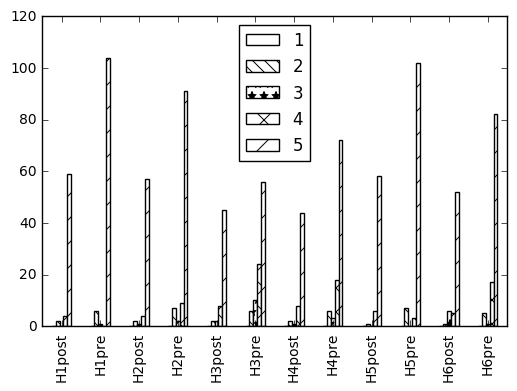

In [195]:
col_dict = dict()
for column in ['H1','H2','H3','H4','H5','H6']:
    heights,bins = np.histogram(df_all[column+"pre"].dropna(),bins=[-1,0,1,2,3,4,5])
    col_dict[column+"pre"] = heights
    heights,bins = np.histogram(df_all[column+"post"].dropna(),bins=[-1,0,1,2,3,4,5])
    col_dict[column+"post"] = heights


df = pd.DataFrame(col_dict)
#df['H2.1'].dropna().hist(bins=[0,1,2,3,4,5])
ax = df[1:6].transpose().plot(kind="bar",color="white")
for container, hatch in zip(ax.containers, (" ", "\\\\","*","X","/")):
    for patch in container.patches:
        patch.set_hatch(hatch)
ax.legend(loc='upper center')
plt.show()

The post-results have fewer results that get washed out against the high number of 5's given in the pre-results. Below are the post-results only

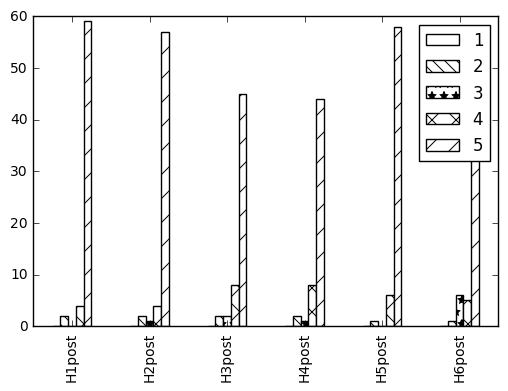

In [196]:
ax = df[['H1post','H2post','H3post','H4post','H5post','H6post']][1:6].transpose().plot(kind="bar",color="white")
for container, hatch in zip(ax.containers, (" ", "\\\\","*","X","/")):
    for patch in container.patches:
        patch.set_hatch(hatch)
ax.legend(loc='best')
plt.show()

# Mann-Whitney U test

I'm not very familiar with these tests, so I've done my best. I had to filter out "Black, not Hispanic" as there was only one respondent of that origin in the matched data. Also not that there are only 3 "Hispanic" respondents which may influence the result.


In [197]:
df_matched.groupby('Origin').count()

,ID,Country,Age,Gender,1st Major,2nd Major,Continuing,Why change,Prog. Ability,Months experience,...,H5post,H6post,SA2,Unnamed: 26,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Origin,,,,,,,,,,,,,,,,,,,,,
Asian or Pacific Islander,25,25,25,24,25,10,24,2,25,20,...,23,23,12,0,25,25,25,25,25,25
"Black, not Hispanic",1,1,1,1,1,0,1,0,1,1,...,1,1,1,0,1,1,1,1,1,1
Hispanic,3,3,3,3,3,1,2,0,3,3,...,3,3,2,0,3,3,3,3,3,3
"White, not Hispanic",18,18,18,18,18,5,14,0,18,14,...,18,18,12,0,18,18,18,18,18,18


In [198]:
import scipy.stats as stats
df_reduce = df_matched[['Origin','H1pre','H1post','H2pre','H2post','H3pre','H3post','H4pre','H4post','H5pre','H5post','H6pre','H6post']][df_matched['Origin']!='Black, not Hispanic']

print("H1")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H1pre, t.H1post)))
print("\nH2")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H2pre, t.H2post)))
print("\nH3")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H3pre, t.H3post)))
print("\nH4")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H4pre, t.H4post)))
print("\nH5")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H5pre, t.H5post)))
print("\nH6")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H6pre, t.H6post)))


H1
Origin
Asian or Pacific Islander     (285.0, 0.257352051018)
Hispanic                        (4.5, 0.396073695898)
White, not Hispanic          (127.0, 0.0663713800146)
dtype: object

H2
Origin
Asian or Pacific Islander     (275.5, 0.208628927509)
Hispanic                        (4.5, 0.396073695898)
White, not Hispanic          (124.5, 0.0798567779064)
dtype: object

H3
Origin
Asian or Pacific Islander    (268.0, 0.188630119646)
Hispanic                                  (4.0, 0.5)
White, not Hispanic          (161.0, 0.493146023086)
dtype: object

H4
Origin
Asian or Pacific Islander    (231.5, 0.0503017846292)
Hispanic                        (3.5, 0.412389047541)
White, not Hispanic           (135.0, 0.173267651118)
dtype: object

H5
Origin
Asian or Pacific Islander    (281.5, 0.244203406965)
Hispanic                       (3.0, 0.252492537547)
White, not Hispanic          (136.5, 0.147618517403)
dtype: object

H6
Origin
Asian or Pacific Islander    (308.0, 0.466400912448)
Hispanic

# Respondents over 24

In [199]:
print("Respondents over 24:", df_all[df_all['Age'] != "> 24"].count().max())
print("Respondents not over 24:", df_all[df_all['Age'] != "> 24"].count().max())
print("Matched Respondents over 24:", df_matched[df_matched['Age'] == "> 24"].count().max())
print("Matched Respondents not over 24:", df_matched[df_matched['Age'] != "> 24"].count().max())

Respondents over 24: 55
Respondents not over 24: 55
Matched Respondents over 24: 30
Matched Respondents not over 24: 18


In [200]:
df_all[(df_all['Months experience'] > 24) & (df_all['Age'] == "> 24")].shape[0]

31

In [201]:
df_all.shape[0]

132

In [202]:
df_matched.shape[0]

48

In [203]:
df_matched[(df_matched['Months experience'] > 24) & (df_matched['Age'] == "> 24")].shape[0]

15